Objective: Analyze the prepared data to find patterns related to shipping performance, product profitability, and customer behavior.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set_style("whitegrid")

# Load the feature-engineered data
df = pd.read_csv('../data/processed/final_features.csv', parse_dates=['order_date_dateorders'])

# Display the first few rows to confirm it's loaded correctly
print(df.head())

    ï»¿type  days_for_shipping_real  days_for_shipment_scheduled  \
0     DEBIT                       3                            4   
1  TRANSFER                       5                            4   
2      CASH                       4                            4   
3     DEBIT                       3                            4   
4   PAYMENT                       2                            4   

   benefit_per_order  sales_per_customer   delivery_status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   late_delivery_risk  category_id   category_name customer_city  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   

In [2]:
print("--- Key Performance Indicators ---")

# On-Time Shipping Rate (The dataset uses 'late_delivery_risk' where 1 is late)
on_time_shipping_rate = 1 - df['late_delivery_risk'].mean()
print(f"On-Time Shipping Rate: {on_time_shipping_rate:.2%}")

# Average Shipping Delay for Late Orders
avg_delay_for_late_orders = df[df['late_delivery_risk'] == 1]['shipping_delay'].mean()
print(f"Average Delay for Late Shipments: {avg_delay_for_late_orders:.2f} days")

# Total Profit
total_profit = df['benefit_per_order'].sum()
print(f"Total Profit: ${total_profit:,.2f}")

--- Key Performance Indicators ---
On-Time Shipping Rate: 45.17%
Average Delay for Late Shipments: 1.62 days
Total Profit: $3,966,902.97


C:\Users\dombl\AppData\Local\Temp\ipykernel_25860\1346992052.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='shipping_mode', y='late_delivery_risk', ci=None)


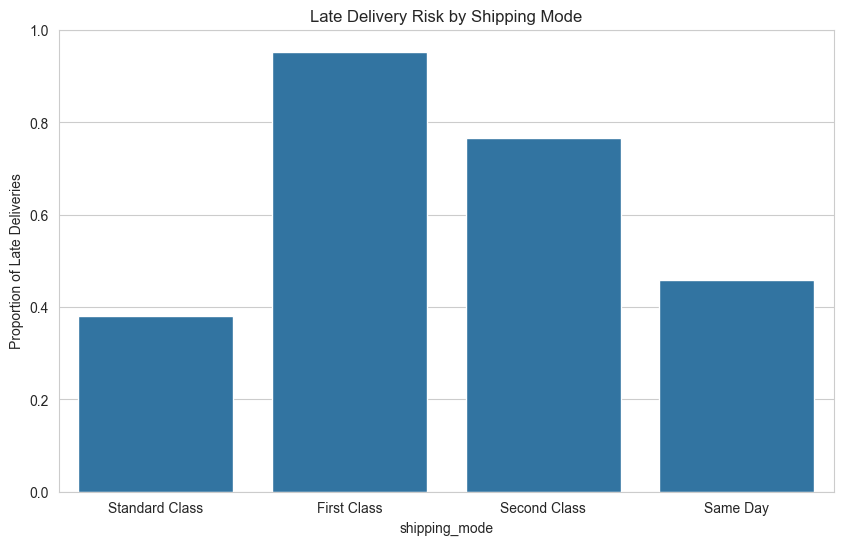

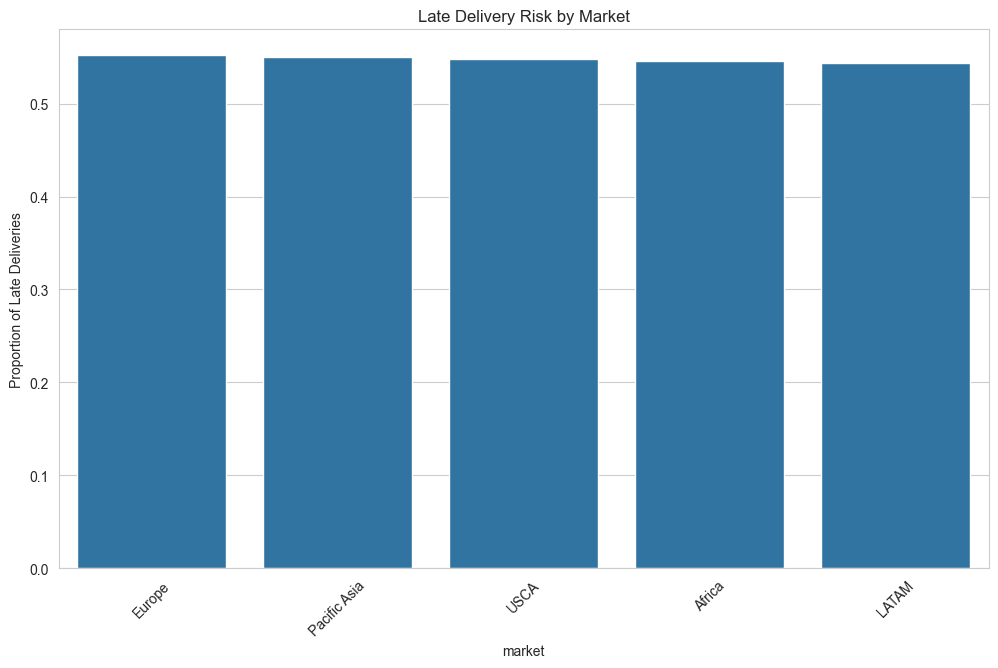

In [3]:
# How does late delivery risk vary by shipping mode?
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='shipping_mode', y='late_delivery_risk', ci=None)
plt.title('Late Delivery Risk by Shipping Mode')
plt.ylabel('Proportion of Late Deliveries')
plt.show()

# Which markets have the highest rate of late shipments?
plt.figure(figsize=(12, 7))
late_risk_by_market = df.groupby('market')['late_delivery_risk'].mean().sort_values(ascending=False)
sns.barplot(x=late_risk_by_market.index, y=late_risk_by_market.values)
plt.title('Late Delivery Risk by Market')
plt.xticks(rotation=45)
plt.ylabel('Proportion of Late Deliveries')
plt.show()

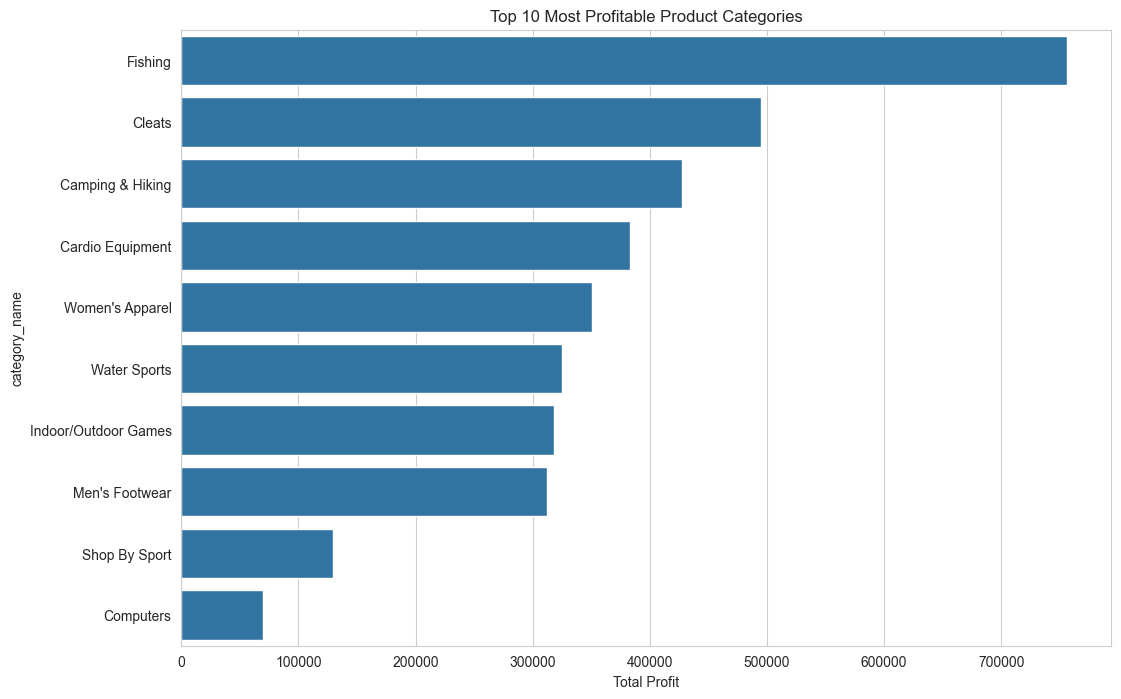

In [4]:
# Which product categories are the most profitable?
plt.figure(figsize=(12, 8))
profit_by_category = df.groupby('category_name')['benefit_per_order'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=profit_by_category.values, y=profit_by_category.index, orient='h')
plt.title('Top 10 Most Profitable Product Categories')
plt.xlabel('Total Profit')
plt.show()

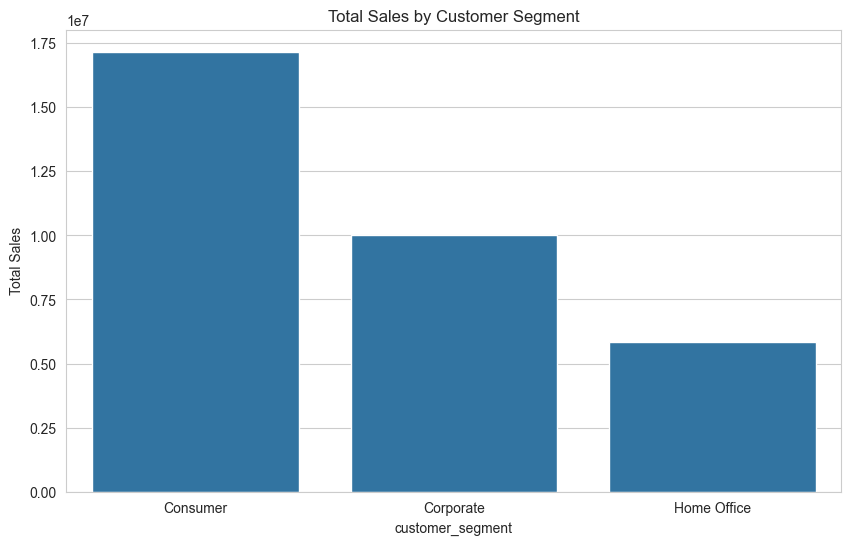

In [5]:
# Which customer segments generate the most sales?
plt.figure(figsize=(10, 6))
sales_by_segment = df.groupby('customer_segment')['sales_per_customer'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_segment.index, y=sales_by_segment.values)
plt.title('Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.show()